#### Dataset : Abalone dataset
#### Target            : Predicting the age of abalones on the basis of physical features
> KNN is supervised machine learning algorithm.<br>
> Non-linear learning algorithm (no hyperplanes).<br>
> Can be used for both classificationa and regression.<br>
> Fast and easy to implement compared to neural networks which can handle complex data but are slow and data hungry.<br>

##### This is basic implementation of KNN by using as few packages as possible. It is solely for understanding purpose.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
# Import dataset
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.head(4)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [3]:
# Rewriting column names
# Found in abalone.names file in the UCI machine learning repository
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings",]

# Remove sex column since it doesnt contribute to the age variable
abalone = abalone.drop("Sex", axis=1)
abalone.head(4)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


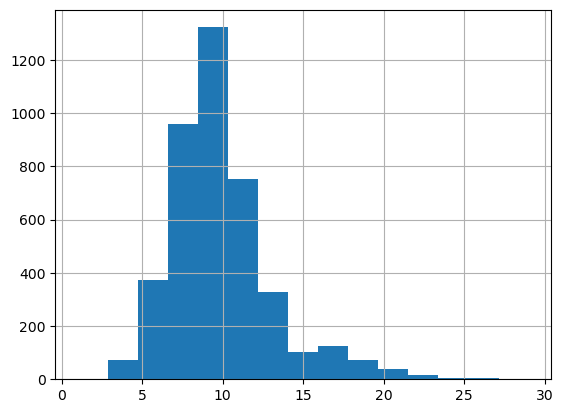

In [4]:
# EXPLORATORY DATA ANALYSIS
abalone["Rings"].hist(bins=15)
plt.show()

> The skewness in rings (ultimatetly age) is mainly due to age process

In [5]:
# Finding the correlation among the variables
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

### Understanding "Neighbors"
In simple terms, your neighbors in your locality are expected to display similar features.<br>
In the reverse order, if we find who your neighbors are, we can categorize your features.<br>

### So how do we find neighbors of a data point?
We do so by representing th data points as vectors and using specific distance calculation methods to find the distance between you and all the other data points.<br>
 > One such method is the Euclidean method. Which is simply differce between vectors or their norms.
 
### What is 'K' in KNN?
After calculating the distance from every neighbor, we find the closet 'K' number of neighbours.<br>
Note that the value of 'K' is always odd number. This is because we will be alloting the same category to our new data point which is held by most number of neighbors from that category and keeping the value of 'K' odd assures that it wont be a 'tie' between two groups.


In [6]:
#Creating the vectors
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [7]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [10]:
# New sample data point which we want to categorize using KNN
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])

In [11]:
# Finding distances
distances = np.linalg.norm(X - new_data_point, axis=1)

In [12]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]  # Find the k closest neighbours and their indexes
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

In [13]:
# Find the values using index or ids that we just found using argsort
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

### Average for regression
Regression outputs a numeric value. Hence we can average the values of combined neighbors

In [14]:
prediction = nearest_neighbor_rings.mean()
prediction

10.0

### Mode for classification
Just like we took mean for regression. We will be taking mode for categorical value. Mode is the value with the highest frequency.

In [15]:
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors) # outputs category 'B'

C:\Users\himan\AppData\Local\Temp\ipykernel_11600\1172676834.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(class_neighbors) # outputs category 'B'
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\himan\AppData\Local\Temp\ipykernel_11600\1172676834.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used ins

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))